<a href="https://colab.research.google.com/github/daemonX10/Data-Science/blob/main/Vgg_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d nunenuh/pytorch-challange-flower-dataset

Dataset URL: https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset
License(s): CC0-1.0
 99% 326M/330M [00:04<00:00, 85.1MB/s]
100% 330M/330M [00:04<00:00, 82.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pytorch-challange-flower-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 6552 files belonging to 102 classes.


In [7]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 818 files belonging to 102 classes.


In [ ]:
validation_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# # Assuming 'process' function is defined elsewhere and responsible for
# # resizing images, ensure it resizes images to (224, 224)

# def process(image, label):
#   # ... other preprocessing steps
#   image = tf.image.resize(image, (224, 224))  # Resize image to match model input
#   return image, label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

# # ... rest of your model definition

In [10]:
import tensorflow

In [11]:
def process(image,label):
   image = tensorflow.cast(image/224.,tensorflow.float32)
   return image,label

In [12]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Vgg with some modification

In [ ]:
from warnings import filters
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))


model.add(Conv2D(filters=128,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512,kernel_size=(3,3),kernel_regularizer=l2(0.01),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2))


model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=4096,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=102,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 111, 111, 128)    

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node sequential_4/conv2d_10/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-54-a7de653eef03>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[32,64,222,222] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_4/conv2d_10/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_13490]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
## Vgg Pretrained
import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/catdog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 37.0MB/s]


'catdog.zip'

In [ ]:
!unzip catdog.zip

Archive:  catdog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: train/Cat/

In [17]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization

In [18]:
epoch = 25
base_model =  VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01),activation='relu',))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(102,activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                      

In [21]:
from keras import callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
callbacks = [early_stopping, reduce_lr]

In [22]:
history = model.fit(train_ds,validation_data=validation_ds,batch_size=32,callbacks=callbacks,epochs=25)

Epoch 1/25
205/205 [==============================] - 52s 188ms/step - loss: 8.2933 - accuracy: 0.4475 - val_loss: 5.0406 - val_accuracy: 0.6259 - lr: 0.0010
Epoch 2/25
205/205 [==============================] - 32s 154ms/step - loss: 4.2353 - accuracy: 0.6909 - val_loss: 4.3481 - val_accuracy: 0.5709 - lr: 0.0010
Epoch 3/25
205/205 [==============================] - 32s 154ms/step - loss: 3.7250 - accuracy: 0.7115 - val_loss: 4.8139 - val_accuracy: 0.4633 - lr: 0.0010
Epoch 4/25
205/205 [==============================] - 34s 164ms/step - loss: 3.5096 - accuracy: 0.7120 - val_loss: 3.9429 - val_accuracy: 0.5831 - lr: 0.0010
Epoch 5/25
205/205 [==============================] - 33s 158ms/step - loss: 3.3881 - accuracy: 0.7123 - val_loss: 3.8887 - val_accuracy: 0.5856 - lr: 0.0010
Epoch 6/25
205/205 [==============================] - 34s 162ms/step - loss: 3.2463 - accuracy: 0.7198 - val_loss: 4.1984 - val_accuracy: 0.5232 - lr: 0.0010
Epoch 7/25
205/205 [==============================] 

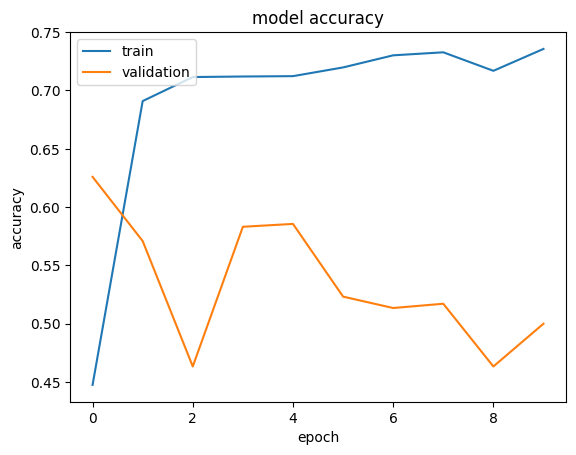

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

